<a href="https://colab.research.google.com/github/pragmatizt/coffee_challenges/blob/master/Earth_Engine_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Didn't know this until now**, but you Google's Earth Engine API can be run on Colab notebooks.

Following a few tutorials to get the hang of it: https://developers.google.com/earth-engine/python_install-colab https://colab.research.google.com/github/google/earthengine-api/blob/master/python/examples/ipynb/ee-api-colab-setup.ipynb

## Import the API

In [0]:
import ee

## Authenticate and Initialize

In [0]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

## Test the API
Let's test the API by printing the elevation of Mount Everest  (the largest mountain in the Philippines)

In [4]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003') # How do I get this code if I would have wanted a different mountain?
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Apo elevation (m): 8729


## Map Visualization
```ee.Image``` objects can be displayed to notebook output cells.  The following two examples demonstrate displaying a static image and an interactive map.

### Static Image
The ```IPython.display``` module contains the ```Image``` function, which can display the results of a URL representing an image generated from a call to the Earth Engine ```getThumbUrl``` function.  The following cell will display a thumbnail of the global elevation model. 

In [7]:
# Import the image function from the IPython.display module.
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url = dem.updateMask(dem.gt(0))
  .getThumbUrl({'min': 0, 'max':4000, 'dimensions':512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

## Interactive Map
The ```[folium](https://python-visualization.github.io/folium/)``` library can be used to display ```ee.Image``` objects on an interactive Leaflet map.  Folium has no default method for handling tiles from Earth Engine, so one must be defined and added to the folium.Map module before use.

The following cell provides an example of adding a method for handling Earth Engine tiles and using it to display an elevation model to a Leaflet map.

In [8]:
# Import the Folium Library
import folium

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
      tiles = map_id_dict['tile_fetcher'].url_format,
      attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
      name = name,
      overlay = True,
      control = True
    ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Set visualization parameters.
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add the elevation model to the map object.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Display the map
display(my_map)

## Chart Visualization

Some Earth Engine functions produce tabular data that can be plotted by data visualization packages such as matplotlib.  The following example demonstrates the display of tabular data from Earth Engine as a scatter plot.  See [Charting in Colaboratory](https://colab.sandbox.google.com/notebooks/charts.ipynb) for more information. 

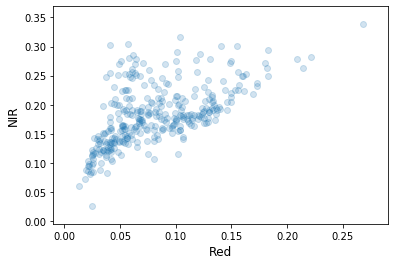

In [9]:
# Import the matplotlib.pyplot module.
import matplotlib.pyplot as plt

# Fetch a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Select Red and NIR bands, scale them, and sample 500 points.
samp_fc = img.select(['B3', 'B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sampple as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()

### List of links recommended in tutorial:
- Folium Library: https://python-visualization.github.io/folium/
- Leaflet Map: https://leafletjs.com/
-  Charting in Colab: https://colab.sandbox.google.com/notebooks/charts.ipynb